# [BAT512] Advanced Data Mining with AI <br/><br/> 7주차 실습자료

- 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 탐색

- 데이터 로드
    - 위스콘신 유방암 데이터(Scikit-learn 제공)

In [2]:
from sklearn import datasets
rawdata = datasets.load_breast_cancer()

In [3]:
print(rawdata["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

- 데이터셋 통합

In [4]:
data_target = np.concatenate([rawdata["data"], rawdata["target"].reshape(-1,1)], axis=1)

In [5]:
independent_variables = rawdata["feature_names"].tolist()
dependent_variable = ["Target"]
feature_list = independent_variables+dependent_variable

In [6]:
data = pd.DataFrame(data_target, columns=feature_list)

- 데이터 형태 확인

In [7]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
data.shape

(569, 31)

- 데이터 범위 및 기술 통계량 확인

- Target 값 분포 확인

In [9]:
data["Target"].value_counts()

1.0    357
0.0    212
Name: Target, dtype: int64

## 데이터 정제

- 입/출력변수 분리

In [10]:
X = data[independent_variables]

In [11]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
y = data["Target"]

In [13]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: Target, Length: 569, dtype: float64

## 데이터셋 분할

- Training/Test 데이터셋 분할

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
print("X:",X.shape,"y:",y.shape)

X: (569, 30) y: (569,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
print("X_train:",X_train.shape,"y_train:",y_train.shape,"\nX_test:",X_test.shape,"y_test:",y_test.shape)

X_train: (455, 30) y_train: (455,) 
X_test: (114, 30) y_test: (114,)


## 의사결정나무

### 의사결정나무 학습

- 모델 선언 및 학습

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

- 변수 중요도

In [19]:
print(model.feature_importances_)

[0.         0.02335827 0.         0.         0.         0.
 0.00476699 0.         0.         0.         0.         0.
 0.         0.02309078 0.00125342 0.         0.         0.
 0.00397249 0.         0.12466585 0.04284271 0.         0.018243
 0.01805554 0.00778609 0.02253855 0.70942631 0.         0.        ]


- 시각화

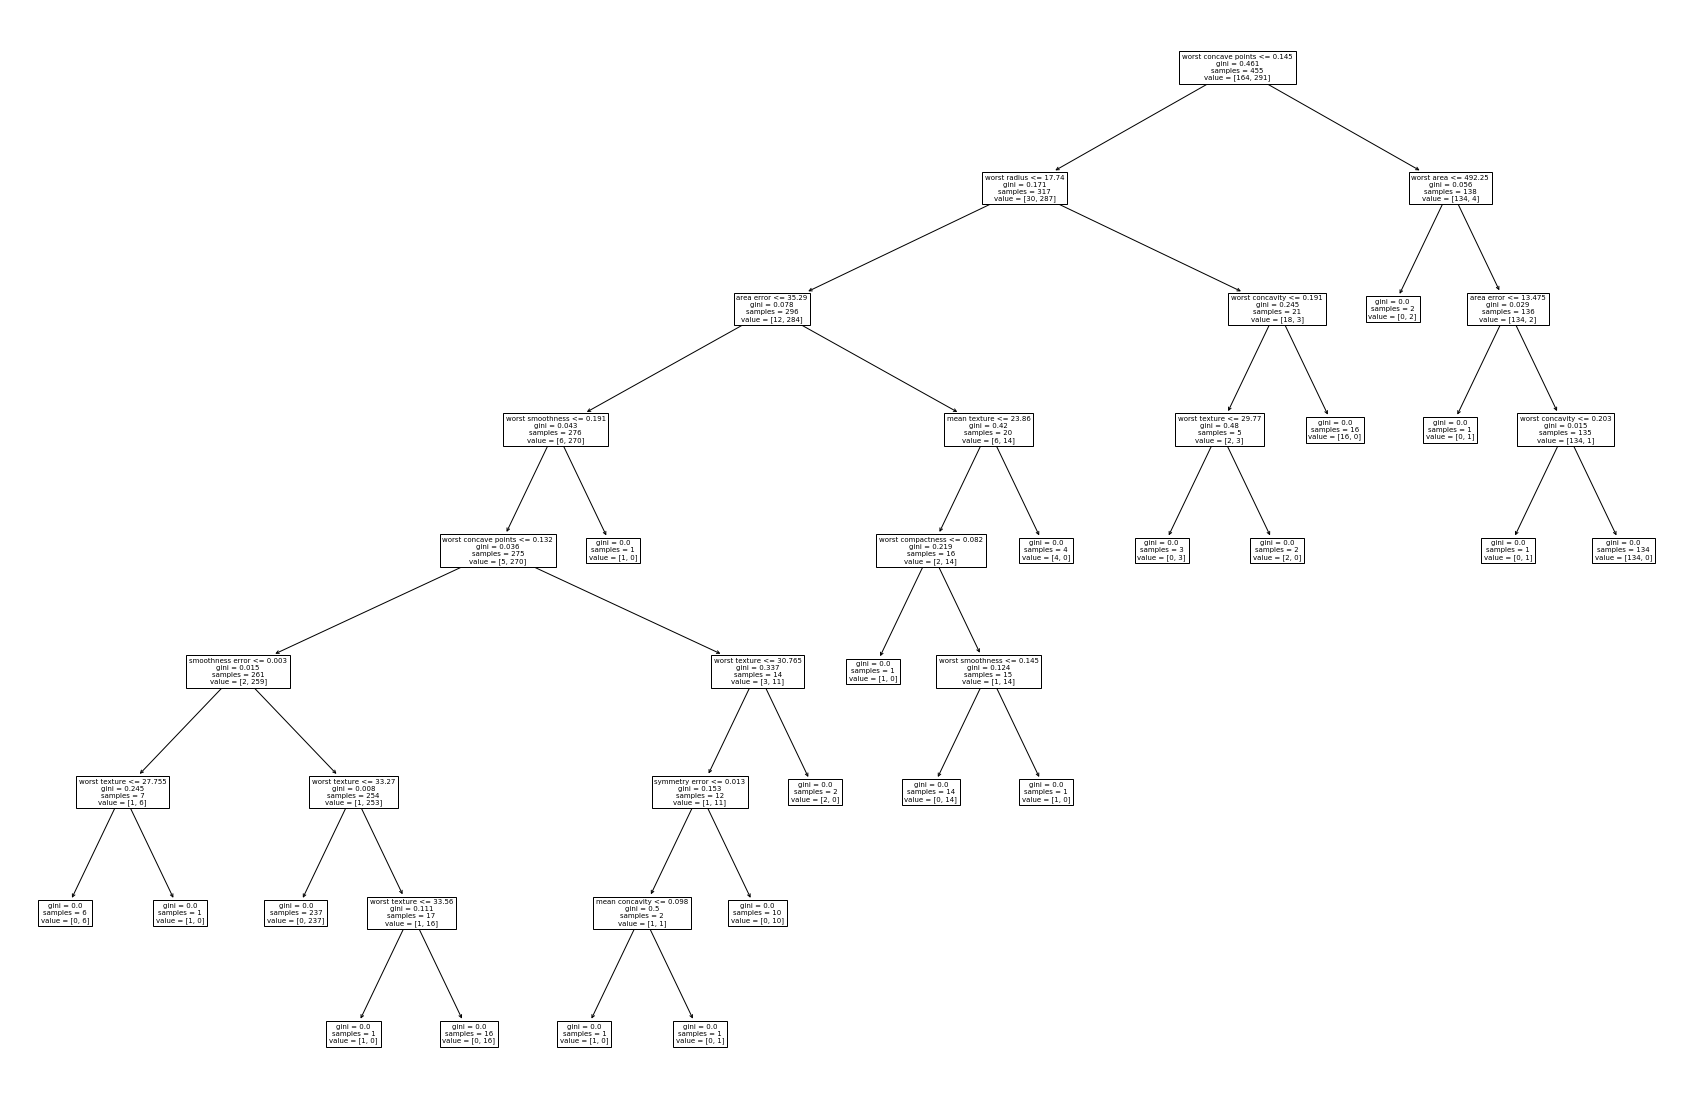

In [20]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize = (30,20))
plot_tree(model, feature_names = independent_variables)
plt.savefig("Decision_tree_visualize.png")
plt.show()

### 의사결정나무 성능 평가

- 테스트 데이터에 대한 예측

In [21]:
y_test_pred = model.predict(X_test)
y_test_pred = pd.Series(y_test_pred, index=y_test.index)

In [22]:
display(pd.concat([y_test, y_test_pred], axis=1))

,Target,0
60,1.0,1.0
271,1.0,1.0
256,0.0,0.0
213,0.0,0.0
30,0.0,0.0
...,...,...
132,0.0,0.0
68,1.0,1.0
3,0.0,0.0
462,1.0,1.0


- 오차행렬 구축

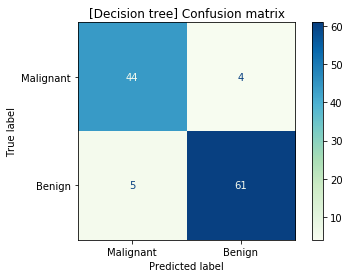

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, y_test_pred)
conf_mat_disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["Malignant", "Benign"])
conf_mat_disp.plot(cmap="GnBu")
plt.title("[Decision tree] Confusion matrix")
plt.show()

- 정확도, 정밀도, 재현율, F1 점수

In [24]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred, target_names=["Malignant", "Benign"])
print("[Decision tree] Classification report\n\n"+report)

[Decision tree] Classification report

              precision    recall  f1-score   support

   Malignant       0.90      0.92      0.91        48
      Benign       0.94      0.92      0.93        66

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



## 랜덤 포레스트

### 랜덤 포레스트 학습

- 모델 선언 및 학습

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100) # n_estimator는 의사결정나무의 개수
model.fit(X_train, y_train)

RandomForestClassifier()

- 변수 중요도

In [26]:
print(model.feature_importances_)

[0.02558852 0.01160537 0.04972671 0.05824164 0.00678676 0.00750471
 0.05622246 0.0802483  0.00536964 0.00395278 0.00607022 0.00309654
 0.01408434 0.04358884 0.00627902 0.00445533 0.00406511 0.00499563
 0.00400888 0.00404377 0.07735813 0.01153157 0.15358812 0.10990431
 0.01166734 0.01464656 0.05440995 0.14078005 0.01814709 0.00803234]


### 랜덤 포레스트 성능 평가

- 테스트 데이터에 대한 예측

In [27]:
y_test_pred = model.predict(X_test)
y_test_pred = pd.Series(y_test_pred, index=y_test.index)

In [28]:
display(pd.concat([y_test, y_test_pred], axis=1))

,Target,0
60,1.0,1.0
271,1.0,1.0
256,0.0,0.0
213,0.0,0.0
30,0.0,0.0
...,...,...
132,0.0,0.0
68,1.0,1.0
3,0.0,0.0
462,1.0,1.0


- 오차행렬 구축

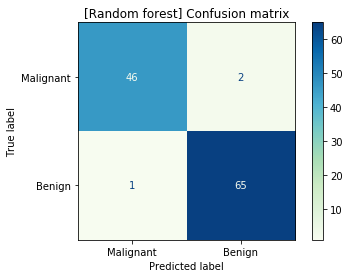

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, y_test_pred)
conf_mat
conf_mat_disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["Malignant", "Benign"])
conf_mat_disp.plot(cmap="GnBu")
plt.title("[Random forest] Confusion matrix")
plt.show()

- 정확도, 정밀도, 재현율, F1 점수

In [30]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred, target_names=["Malignant", "Benign"])
print("[Random forest] Classification report\n\n"+report)

[Random forest] Classification report

              precision    recall  f1-score   support

   Malignant       0.98      0.96      0.97        48
      Benign       0.97      0.98      0.98        66

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

